## Midterm Quiz 1: Interactive Lab (Neural Networks)

Name: Nicolas, Sean Julian S.

Section: CPE019|S3

Instructor: Roman, Richard

## Loading dataset and importing libraries

In [ ]:
pip install ucimlrepo

In [ ]:
import numpy as np
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sn
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
phiusiil_phishing_url_website = fetch_ucirepo(id=967)

# data (as pandas dataframes)
X = phiusiil_phishing_url_website.data.features
y = phiusiil_phishing_url_website.data.targets

## Task 1: Exploratory Data Analysis (Cleaning + Prepping the dataset)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         235795 non-null  object 
 1   URLLength                   235795 non-null  int64  
 2   Domain                      235795 non-null  object 
 3   DomainLength                235795 non-null  int64  
 4   IsDomainIP                  235795 non-null  int64  
 5   TLD                         235795 non-null  object 
 6   URLSimilarityIndex          235795 non-null  float64
 7   CharContinuationRate        235795 non-null  float64
 8   TLDLegitimateProb           235795 non-null  float64
 9   URLCharProb                 235795 non-null  float64
 10  TLDLength                   235795 non-null  int64  
 11  NoOfSubDomain               235795 non-null  int64  
 12  HasObfuscation              235795 non-null  int64  
 13  NoOfObfuscated

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   label   235795 non-null  int64
dtypes: int64(1)
memory usage: 1.8 MB


In [ ]:
X.head(5)

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,1,0,0,1,34,20,28,119,0,124
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,0,1,50,9,8,39,0,217
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,0,1,10,2,7,42,2,5
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,0,1,1,1,3,27,15,22,1,31
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,1,0,1,244,15,34,72,1,85


In [ ]:
print(X.shape)
print(y.shape)

(235795, 54)
(235795, 1)


In [ ]:
X = X.drop('Title', axis=1)
X = X.drop('URL', axis=1)
X = X.drop('Domain', axis=1)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
X['TLD']= label_encoder.fit_transform(X['TLD'])

In [ ]:
print(X.shape)

(235795, 51)


In [ ]:
X.head(10)

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,31,24,0,231,100.0,1.000000,0.522907,0.061933,3,1,...,1,0,0,1,34,20,28,119,0,124
1,23,16,0,254,100.0,0.666667,0.032650,0.050207,2,1,...,0,0,0,1,50,9,8,39,0,217
2,29,22,0,647,100.0,0.866667,0.028555,0.064129,2,2,...,0,0,0,1,10,2,7,42,2,5
3,26,19,0,231,100.0,1.000000,0.522907,0.057606,3,1,...,0,1,1,1,3,27,15,22,1,31
4,33,26,0,503,100.0,1.000000,0.079963,0.059441,3,1,...,1,1,0,1,244,15,34,72,1,85
5,30,23,0,503,100.0,1.000000,0.079963,0.060614,3,1,...,0,0,0,1,35,1,11,86,0,14
6,25,18,0,231,100.0,1.000000,0.522907,0.063549,3,1,...,0,0,0,1,32,4,14,44,2,17
7,25,18,0,231,100.0,1.000000,0.522907,0.060486,3,1,...,0,0,0,1,24,2,22,36,0,15
8,29,22,0,368,100.0,1.000000,0.005084,0.056980,2,1,...,0,0,0,1,71,4,9,40,1,317
9,18,11,0,503,100.0,1.000000,0.079963,0.070497,3,1,...,0,0,0,1,10,1,12,173,6,65


## Task 2: Data modelling using ANN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:
model  = Sequential([
    Dense(6, input_shape=(51,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 312       
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 361 (1.41 KB)
Trainable params: 361 (1.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train the model

In [ ]:
model.compile(SGD(lr = .005), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=5)

Epoch 1/5
5895/5895 [==============================] - 20s 3ms/step - loss: 0.0280 - accuracy: 0.9941 - val_loss: 0.0052 - val_accuracy: 0.9984
Epoch 2/5
5895/5895 [==============================] - 14s 2ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0028 - val_accuracy: 0.9990
Epoch 3/5
5895/5895 [==============================] - 13s 2ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0019 - val_accuracy: 0.9993
Epoch 4/5
5895/5895 [==============================] - 14s 2ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0015 - val_accuracy: 0.9994
Epoch 5/5
5895/5895 [==============================] - 13s 2ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0012 - val_accuracy: 0.9995


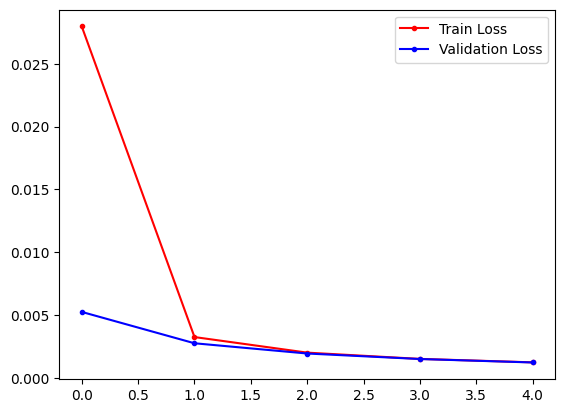

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

- Based from this plot, the training was able to learn so fast based on the sharp change in direction of the line.

## Conclusion

- In this activity I was able to apply exploratory data analysis and data modelling using ANN in the dataset provided for this activity. The preprocessing that I did in this activit is to drop variables like the URL, Title, and Domain because I think it's redundant. I left TLD since I think that represents the 3 variables that I dropped because TLD is the last segment of the domain name. After that I converted it from object type into integer so that I am able to use it in the model. In the data modelling part of the activity, I observed that the accuracy heavily depended on wether I would implement that Standard Scalar. I observed that when I applied the Standard Scalar, the accuracy got into 99% from the beginning which is confusing since it was able to learn so fast. The second thing that I observed is when I removed the standard scalar, the model wasn't able to learn and the accuracy did not change.